In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

Looking the dataset below, we can see it has non_linear dataset. If we try to fit in the straight line, it will not be able to consider all the points equally. That's why we have to use polynomial regression. <br>
Thing that we should consider while applying the degree is that if we give low degree there is high chance that we underfit and if you give high degree, we overfit. We have to tune this hyperparameter carefully.


In [2]:
X = 6 * np.random.rand(200,1) - 3

In [22]:
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

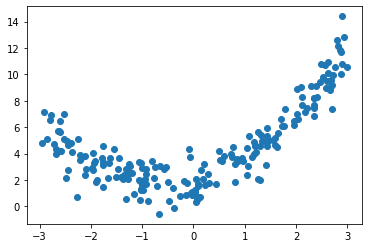

In [23]:
plt.scatter(X,y)

In [24]:
Xtrain, Xtest, ytrain,ytest = train_test_split(X,y,test_size=0.1, random_state=1)

In [25]:
lr = LinearRegression()
lr.fit(Xtrain,ytrain)

LinearRegression()

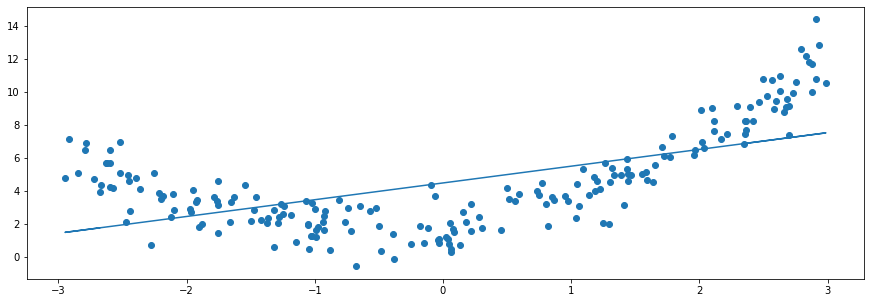

In [26]:
plt.figure(figsize=(15,5))
plt.scatter(X,y)
plt.plot(Xtrain,lr.predict(Xtrain))

In [27]:
pred= lr.predict(Xtest)

In [71]:
pf = PolynomialFeatures(degree=2, include_bias=False) #include_bias = True/False. If we set it to true,
#it will include x^0 as well
pf.fit(Xtrain)

PolynomialFeatures(include_bias=False)

In [72]:
Xtrain_transformed = pf.transform(Xtrain)
Xtest_transformed = pf.transform(Xtest)

In [74]:
print(Xtrain_transformed[0]) #here we can see that for every X it has created x^1 and x^2. If we set include_bias = True, it
#will incude x^0 which is simply 1, then every row would had 1 in a zero index
print(Xtrain[0])

[2.3505408  5.52504207]
[2.3505408]


# Using the polynomial regression

In [59]:
lr_second = LinearRegression()
lr_second.fit(Xtrain_transformed, ytrain)

LinearRegression()

In [60]:
pred_second = lr_second.predict(Xtest_transformed)

In [62]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = pf.transform(X_new)
y_new = lr_second.predict(X_new_poly)

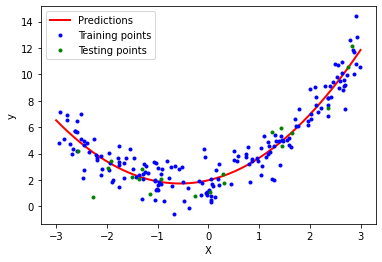

In [64]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(Xtrain, ytrain, "b.",label='Training points')
plt.plot(Xtest, ytest, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [68]:
print(f'The r2_score of linear regression is: {r2_score(ytest, pred)}')

The r2_score of linear regression is: 0.5151171139491018


In [70]:

print(f'The r2_score of polynomial regression is: {r2_score(ytest, pred_second)}')

The r2_score of polynomial regression is: 0.8865332296759794


If we compare the r2_score of both regression, we can see that polynomial justifies the generated dataset well. 